# Маркетинговое исследование

# Удовлетворённость обслуживанием БАНКА

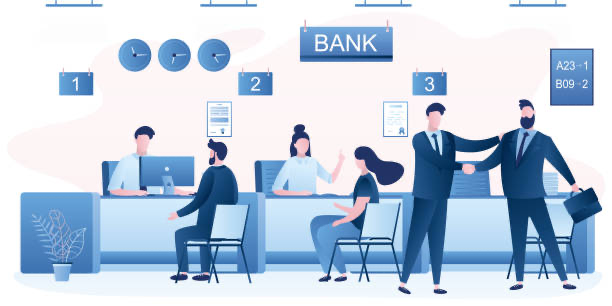

## Импорт библиотек, константы

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
RANDOM_STATE = 42

In [10]:
DATASET_PATH = "datasets/bank_clients_clean.csv"

## Загрузка и обзор данных

### Загрузка

In [11]:
# загрузка данных
df = pd.read_csv(DATASET_PATH)
df.head(5)

,AGREEMENT_RK,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,TARGET
0,60099204,42,1,0,1,1,0,25000.0,1,1,1
1,62244665,28,1,0,1,1,1,10000.0,1,1,0
2,61050759,64,1,1,0,2,0,30000.0,1,1,0
3,62079659,54,1,0,1,0,0,25000.0,1,1,0
4,66583553,26,1,0,0,1,1,15000.0,2,2,0


### Описание данных

**Целевая переменная**
- `TARGET`: целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было);

**Признаки**
- `AGREEMENT_RK`(int): — уникальный идентификатор объекта в выборке;
- `Age` (numeric, int): — возраст клиента;
- `SOCSTATUS_WORK_FL` (categorical) — социальный статус клиента относительно работы (1 — работает, 0 — не работает);
- `SOCSTATUS_PENS_FL` (categorical) — социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
- `GENDER` (categorical) - пол клиента (1 — мужчина, 0 — женщина);
- `CHILD_TOTAL` (categorical) — количество детей клиента;
- `DEPENDANTS` (int) — — количество иждивенцев клиента;;
- `PERSONAL_INCOME` (float) личный доход клиента (в рублях);
- `LOAN_NUM_TOTAL` (int) — количество ссуд клиента;
- `LOAN_NUM_CLOSED` (int) — количество погашенных ссуд клиента.


### План на первый этап работы


* построены графики распределений числовых признаков (не менее, чем по двум признакам)
* построена матрица корреляций
* построены графиков зависимостей целевой переменной и признаков (не менее, чем два графика)
* вычислены числовые характеристики распределения числовых столбцов (среднее, min, max, медиана и так далее)
* вычислены числовые характеристики категориальных столбцов
* отображено число пропусков, дубликатов в данных
* сделаны дополнительные исследования

In [12]:
# информация о датасете
df.shape

(16900, 11)

In [13]:
df.shape[0]

16900

In [14]:
# информация о столбцах
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16900 entries, 0 to 16899
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AGREEMENT_RK       16900 non-null  int64  
 1   AGE                16900 non-null  int64  
 2   SOCSTATUS_WORK_FL  16900 non-null  int64  
 3   SOCSTATUS_PENS_FL  16900 non-null  int64  
 4   GENDER             16900 non-null  int64  
 5   CHILD_TOTAL        16900 non-null  int64  
 6   DEPENDANTS         16900 non-null  int64  
 7   PERSONAL_INCOME    16900 non-null  float64
 8   LOAN_NUM_TOTAL     16900 non-null  int64  
 9   LOAN_NUM_CLOSED    16900 non-null  int64  
 10  TARGET             16900 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 1.4 MB


In [15]:
#проверяем на дублткаты
df.duplicated().sum()

1306

In [16]:
df.drop_duplicates()

,AGREEMENT_RK,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,TARGET
0,60099204,42,1,0,1,1,0,25000.0,1,1,1
1,62244665,28,1,0,1,1,1,10000.0,1,1,0
2,61050759,64,1,1,0,2,0,30000.0,1,1,0
3,62079659,54,1,0,1,0,0,25000.0,1,1,0
4,66583553,26,1,0,0,1,1,15000.0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...
16895,66751099,26,1,0,1,1,1,8000.0,2,2,0
16896,64562377,26,1,0,0,0,0,12000.0,1,1,0
16897,62236542,30,1,0,1,0,0,9000.0,1,1,0
16898,66739926,25,1,0,0,0,0,12000.0,1,1,0


In [17]:
df.isnull().sum()

AGREEMENT_RK         0
AGE                  0
SOCSTATUS_WORK_FL    0
SOCSTATUS_PENS_FL    0
GENDER               0
CHILD_TOTAL          0
DEPENDANTS           0
PERSONAL_INCOME      0
LOAN_NUM_TOTAL       0
LOAN_NUM_CLOSED      0
TARGET               0
dtype: int64

In [18]:
# информация о числовых колонках
df.describe()

,AGREEMENT_RK,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,TARGET
count,1.690000e+04,16900.000000,16900.000000,16900.000000,16900.000000,16900.000000,16900.000000,16900.000000,16900.000000,16900.000000,16900.000000
mean,6.238522e+07,40.379763,0.908698,0.135089,0.651834,1.096272,0.643491,13200.920118,1.322663,1.322663,0.114497
std,1.440527e+07,11.617386,0.288046,0.341828,0.476403,0.999389,0.813121,9225.164961,0.829494,0.829494,0.318423
min,0.000000e+00,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.146098e+07,30.000000,1.000000,0.000000,0.000000,0.000000,0.000000,8000.000000,1.000000,1.000000,0.000000
50%,6.398442e+07,39.000000,1.000000,0.000000,1.000000,1.000000,0.000000,11500.000000,1.000000,1.000000,0.000000
75%,6.702139e+07,50.000000,1.000000,0.000000,1.000000,2.000000,1.000000,16000.000000,1.000000,1.000000,0.000000
max,7.529224e+07,67.000000,1.000000,1.000000,1.000000,10.000000,7.000000,250000.000000,11.000000,11.000000,1.000000


In [31]:
df['AGREEMENT_RK'].dtype

dtype('int64')

In [22]:
# полжительный целевой параметр т.е сколько откликов зарегестрировали
filtered_df = df[df['TARGET'] == 1]
filtered_df.shape[0]

1935

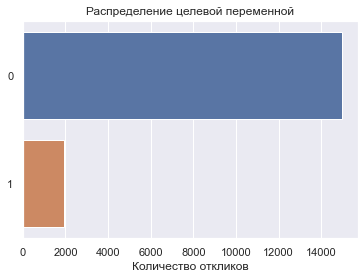

In [23]:
sns.set()

fig, ax = plt.subplots()
ax = sns.countplot(y='TARGET', data=df)
ax.set_title('Распределение целевой переменной')
ax.set_ylabel('')

ax.set(xlabel='Количество откликов')


plt.show()

In [25]:
# находим минимальный возразт респондентов
min_target = df['AGE'].min()
min_target

21

In [26]:
# находим махимальный возразт респондентов
max_target = df['AGE'].max()
max_target

67

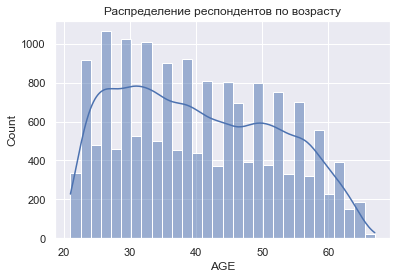

In [38]:
#распределение по возрасту
sns.histplot(df['AGE'], kde=True)
plt.title('Распределение респондентов по возрасту')
plt.show()

In [27]:
# находим минимальный доход респондентов
min_income_target = df['PERSONAL_INCOME'].min()
min_income_target

0.0

In [28]:
# находим максимальный доход респондентов
max_income_target = df['PERSONAL_INCOME'].max()
max_income_target

250000.0

In [30]:
# находим средний доход респондентов
mean_income_target = df['PERSONAL_INCOME'].mean()
round(mean_income_target)

13201

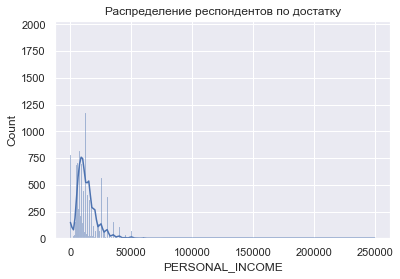

In [39]:
#распределение по достатку
sns.histplot(df['PERSONAL_INCOME'], kde=True)
plt.title('Распределение респондентов по достатку')
plt.show()


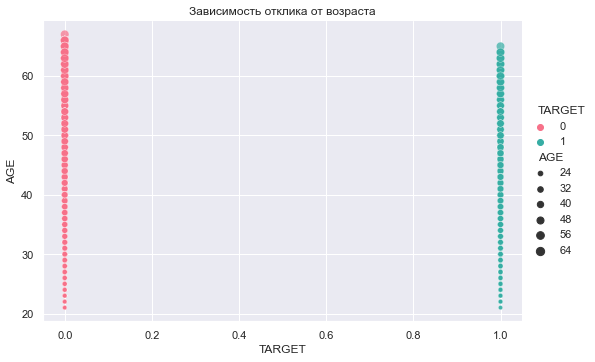

In [21]:
sns.relplot(x='TARGET', y='AGE', hue='TARGET', size='AGE', data=df, height=5, aspect=1.5, alpha=0.7, palette='husl')
plt.title("Зависимость отклика от возраста")
plt.show()

In [22]:
#чем ближе пенсия тем человек активней откликается на маркетинг

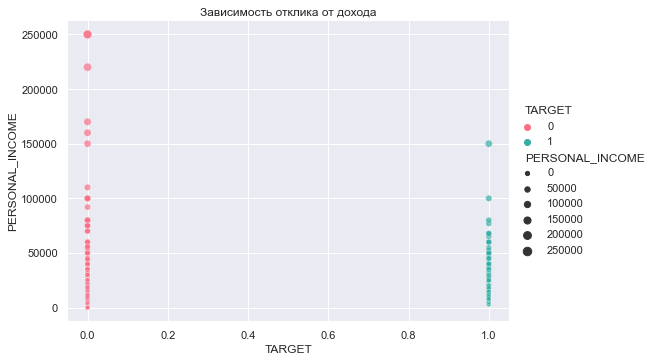

In [23]:
sns.relplot(x='TARGET', y='PERSONAL_INCOME', hue='TARGET', size='PERSONAL_INCOME', data=df, height=5, aspect=1.5, alpha=0.7, palette='husl')
plt.title("Зависимость отклика от дохода")
plt.show()

In [24]:
#как и предпологалось: после 150000  все эти рекламные, маркетинговые как-то становится фиолетовыми

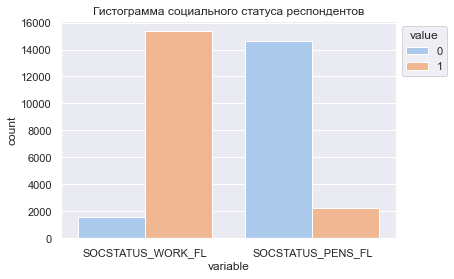

In [43]:
c = sns.countplot(x='variable', hue='value', data=pd.melt(df[['SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL',]]), palette='pastel')
sns.move_legend(c, 'upper left', bbox_to_anchor=(1, 1))
plt.title("Гистограмма социального статуса респондентов")
plt.show()

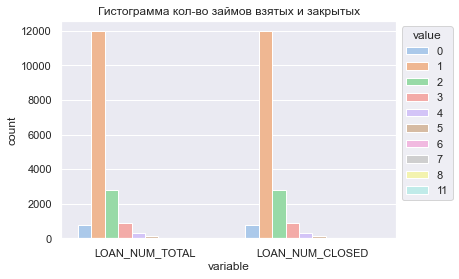

In [44]:
d = sns.countplot(x='variable', hue='value', data=pd.melt(df[['LOAN_NUM_TOTAL', 'LOAN_NUM_CLOSED',]]), palette='pastel')
sns.move_legend(d, 'upper left', bbox_to_anchor=(1, 1))
plt.title("Гистограмма кол-во займов взятых и закрытых")
plt.show()

In [27]:
#все кто брал по одному кредиту как правило закрывали(но мы то знаем есть клиенты с 11-ю займами)

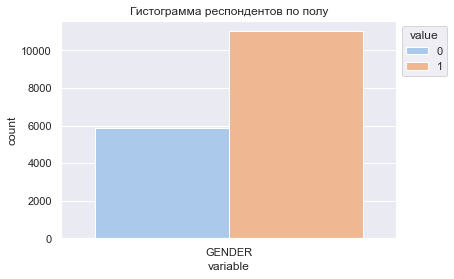

In [32]:
e = sns.countplot(x='variable', hue='value', data=pd.melt(df[['GENDER',]]), palette='pastel')
sns.move_legend(e, 'upper left', bbox_to_anchor=(1, 1))
plt.title("Гистограмма респондентов по полу")
plt.show()

In [ ]:
#неравенство муж-и-и-ки в банках. Женшины наверное все в магазинах.

#### Построим матрицу корреляций

Коэффициент корреляции $\rho$ - это мера взаимосвязи между двумя величинами (корреляция Пирсона - мера линейной зависимости).

$-1 \leq \rho \leq 1$

Чем больше **по модулю** коэффициент корреляции $\rho$ - тем больше взаимосвязь между величинами.

In [29]:
df.corr()

,AGREEMENT_RK,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,TARGET
AGREEMENT_RK,1.000000,-0.000115,-0.006457,0.006639,0.025921,0.009776,0.009403,0.289012,0.427012,0.427012,0.077726
AGE,-0.000115,1.000000,-0.456058,0.561732,0.148174,0.209157,-0.284413,-0.084076,0.025006,0.025006,-0.102727
SOCSTATUS_WORK_FL,-0.006457,-0.456058,1.000000,-0.802058,-0.105744,-0.039972,0.200582,0.187376,0.033154,0.033154,0.075916
SOCSTATUS_PENS_FL,0.006639,0.561732,-0.802058,1.000000,0.135126,0.060663,-0.245706,-0.134287,-0.006812,-0.006812,-0.080677
GENDER,0.025921,0.148174,-0.105744,0.135126,1.000000,0.052259,-0.079389,-0.220750,0.010864,0.010864,-0.029373
CHILD_TOTAL,0.009776,0.209157,-0.039972,0.060663,0.052259,1.000000,0.511707,-0.047758,0.038334,0.038334,0.009988
DEPENDANTS,0.009403,-0.284413,0.200582,-0.245706,-0.079389,0.511707,1.000000,0.033886,0.053434,0.053434,0.048874
PERSONAL_INCOME,0.289012,-0.084076,0.187376,-0.134287,-0.220750,-0.047758,0.033886,1.000000,0.078672,0.078672,0.109593
LOAN_NUM_TOTAL,0.427012,0.025006,0.033154,-0.006812,0.010864,0.038334,0.053434,0.078672,1.000000,1.000000,-0.001423
LOAN_NUM_CLOSED,0.427012,0.025006,0.033154,-0.006812,0.010864,0.038334,0.053434,0.078672,1.000000,1.000000,-0.001423


<AxesSubplot:>

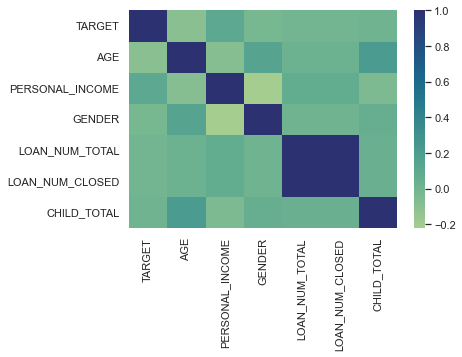

In [31]:
corr = df[['TARGET', 'AGE', 'PERSONAL_INCOME', 'GENDER','LOAN_NUM_TOTAL', 'LOAN_NUM_CLOSED', 'CHILD_TOTAL']].corr()
sns.heatmap(corr, cmap="crest")

In [32]:
#corr = df.corr() # матрица корреляций

#sns.heatmap(corr, cmap="Blues", annot=True)
#sns.heatmap(corr, cmap="Blues")

In [38]:
#pd.plotting.scatter_matrix(df[["PERSONAL_INCOME","TARGET"]],
#                           figsize=(15,7),
#                           diagonal='kde',
#                           color='red');

In [37]:
#pd.plotting.scatter_matrix(df[["AGE","TARGET"]],
#                           figsize=(15,7),
#                           diagonal='kde',
#                           color='red');